In [36]:
import pandas as pd
df = pd.read_csv('/content/tips (data for regression problem).csv')
df


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


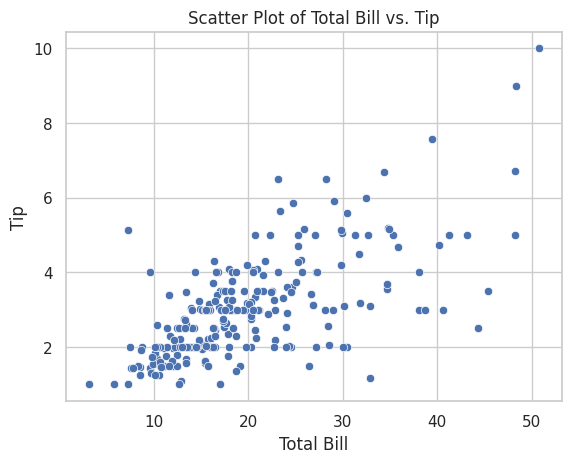

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
  df = pd.read_csv('/content/tips (data for regression problem).csv')
except FileNotFoundError:
  print("Error: File not found. Please make sure the file path is correct.")
  exit()


sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot of Total Bill vs. Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

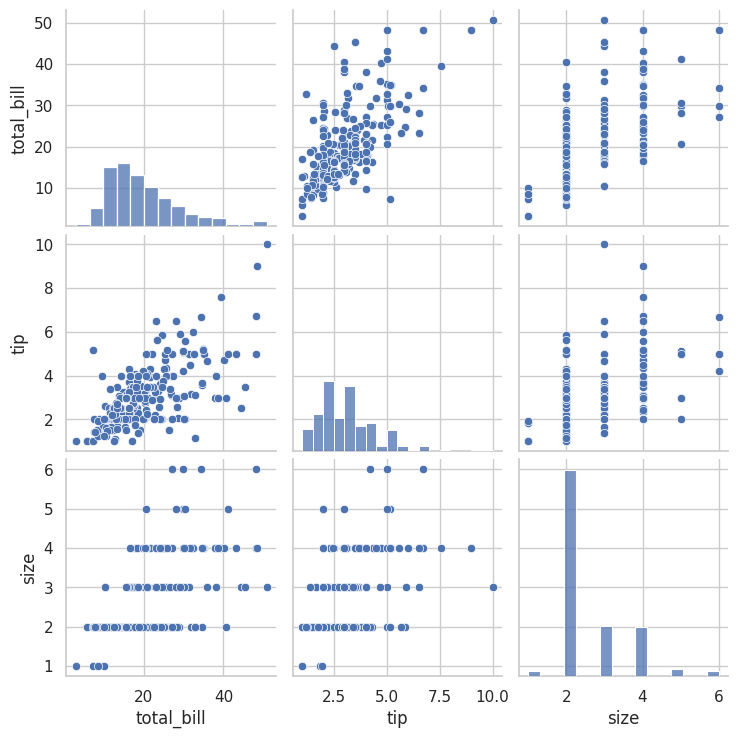

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
try:
  df = pd.read_csv('/content/tips (data for regression problem).csv')
except FileNotFoundError:
  print("Error: File not found. Please make sure the file path is correct.")
  exit()

sns.pairplot(df)
plt.show()

In [29]:
# prompt: encode all columns /content/tips (data for regression problem).csv

import pandas as pd


try:
  df = pd.read_csv('/content/tips (data for regression problem).csv')
except FileNotFoundError:
  print("Error: File not found. Please make sure the file path is correct.")
  exit()


for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is of object (string) type
        df[col] = df[col].astype('category').cat.codes

print(df.head())

   total_bill   tip  sex  smoker  day  time  size
0       16.99  1.01    0       0    2     0     2
1       10.34  1.66    1       0    2     0     3
2       21.01  3.50    1       0    2     0     3
3       23.68  3.31    1       0    2     0     2
4       24.59  3.61    0       0    2     0     4


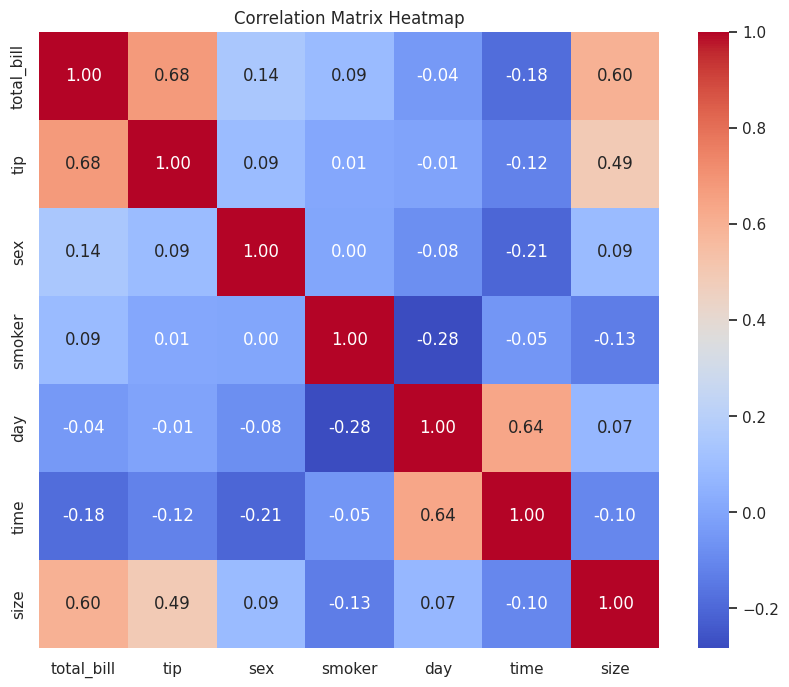

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


try:
    df = pd.read_csv('/content/tips (data for regression problem).csv')
except FileNotFoundError:
    print("Error: File not found. Please make sure the file path is correct.")
    exit()


for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes


correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [40]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr


try:
    df = pd.read_csv('/content/tips (data for regression problem).csv')
except FileNotFoundError:
    print("Error: File not found. Please make sure the file path is correct.")
    exit()


for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

def rainbow_test(df, x_col, y_col):


    correlation, p_value = spearmanr(df[x_col], df[y_col])


    linearity_likely = abs(correlation) > 0.5 and p_value < 0.05


    return correlation, p_value, linearity_likely


x_col = 'total_bill'  # Replace with your independent variable
y_col = 'tip'  # Replace with your dependent variable
correlation, p_value, linearity_likely = rainbow_test(df, x_col, y_col)


print(f"Spearman's rank correlation: {correlation}")
print(f"P-value: {p_value}")

if linearity_likely:
    print("Linearity is likely.")
else:
    print("Linearity is unlikely.")

Spearman's rank correlation: 0.6789681219001009
P-value: 2.501158440923619e-34
Linearity is likely.


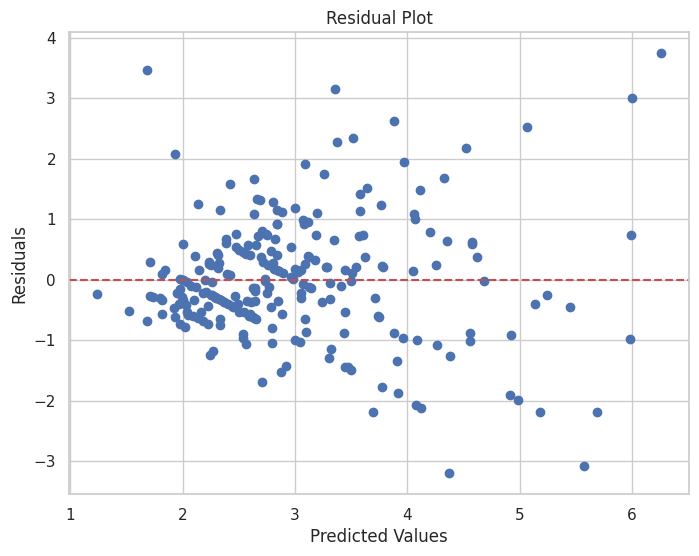

Mean Squared Error (MSE): 1.036019442011377


In [42]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


try:
    df = pd.read_csv('/content/tips (data for regression problem).csv')
except FileNotFoundError:
    print("Error: File not found. Please make sure the file path is correct.")
    exit()


for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes


X = df[['total_bill']]  # Example: using only 'total_bill' as a predictor
y = df['tip']


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)


residuals = y - y_pred


plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score


try:
    df = pd.read_csv('/content/tips (data for regression problem).csv')
except FileNotFoundError:
    print("Error: File not found. Please make sure the file path is correct.")
    exit()


for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes


X = df.drop('tip', axis=1)  # Use all columns except 'tip' as features
y = df['tip']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_r2 = r2_score(y_test, linear_predictions)


ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_predictions)


lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_predictions)


print(f"Linear Regression R-squared: {linear_r2}")
print(f"Ridge Regression R-squared: {ridge_r2}")
print(f"Lasso Regression R-squared: {lasso_r2}")


lasso_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
print("\nLasso Regression Coefficients:")
print(lasso_coefficients)


if lasso_r2 > linear_r2 and lasso_r2 > ridge_r2:
    print("\nInsights:")
    print("Lasso Regression provides the best predictive performance.")
    important_features = lasso_coefficients[lasso_coefficients['Coefficient'] != 0]['Feature'].tolist()
    print("Important features:", important_features)


Linear Regression R-squared: 0.4441368826121932
Ridge Regression R-squared: 0.44578795338299404
Lasso Regression R-squared: 0.5273068720881755

Lasso Regression Coefficients:
      Feature  Coefficient
0  total_bill     0.099099
1         sex     0.000000
2      smoker    -0.000000
3         day     0.000000
4        time     0.000000
5        size     0.108081

Insights:
Lasso Regression provides the best predictive performance.
Important features: ['total_bill', 'size']
